In [92]:
#First we create a API from out kaggle account
#Than we will upload and use that .json to connect our kaggle account
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [52]:
# Replace 'noulam/tomato' with the dataset's name from Kaggle
!kaggle datasets download -d noulam/tomato

Dataset URL: https://www.kaggle.com/datasets/noulam/tomato
License(s): copyright-authors
tomato.zip: Skipping, found more recently modified local copy (use --force to force download)


In [53]:
#Extracting the zip file
import zipfile
with zipfile.ZipFile("tomato.zip", 'r') as zip_ref:
    zip_ref.extractall("data")


In [68]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [93]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [70]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/data/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/data/New Plant Diseases Dataset(Augmented)/valid'

In [101]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

# Use pre-trained InceptionV3 without the top layer
inception = InceptionV3(input_shape=[224, 224, 3], weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in inception.layers:
    layer.trainable = False

# Flatten the output layer and add a Dense layer for predictions
x = Flatten()(inception.output)
prediction = Dense(10, activation='softmax')(x)  # 10 classes

# Create the model
model = Model(inputs=inception.input, outputs=prediction)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [86]:
# view the structure of the model
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_376 (Conv2D)       │ (None, 111, 111, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_376   │ (None, 111, 111, 32)   │             96 │ conv2d_376[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_376            │ (None, 111, 111, 32)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_377 (Conv2D)       │ (None, 109, 109, 32)   │          9,216 │ activation_376[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_377   │ (None, 109, 109, 32)   │             96 │ conv2d_377[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_377            │ (None, 109, 109, 32)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_378 (Conv2D)       │ (None, 109, 109, 64)   │         18,432 │ activation_377[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_378   │ (None, 109, 109, 64)   │            192 │ conv2d_378[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_378            │ (None, 109, 109, 64)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 54, 54, 64)     │              0 │ activation_378[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_379 (Conv2D)       │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_379   │ (None, 54, 54, 80)     │            240 │ conv2d_379[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_379            │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_380 (Conv2D)  

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [88]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#Here we will just rescale our test data as testing has to be done on it
test_datagen = ImageDataGenerator(rescale = 1./255)

In [89]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/data/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [102]:
test_set = test_datagen.flow_from_directory('/content/data/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [107]:
# fit the model
# Run the cell. It will take some time to execute
Results = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 245s 213ms/step - accuracy: 0.7865 - loss: 3.3752 - val_accuracy: 0.7904 - val_loss: 3.7407
Epoch 2/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 16us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 262s 212ms/step - accuracy: 0.8224 - loss: 3.0315 - val_accuracy: 0.7978 - val_loss: 4.1925
Epoch 4/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 17us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 244s 212ms/step - accuracy: 0.8297 - loss: 3.4052 - val_accuracy: 0.8401 - val_loss: 3.5676
Epoch 6/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 244s 212ms/step - accuracy: 0.8553 - loss: 2.8614 - val_accuracy: 0.8231 - val_loss: 3.9610
Epoch 8/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 19us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 244s 212ms/step - accuracy: 0.8629

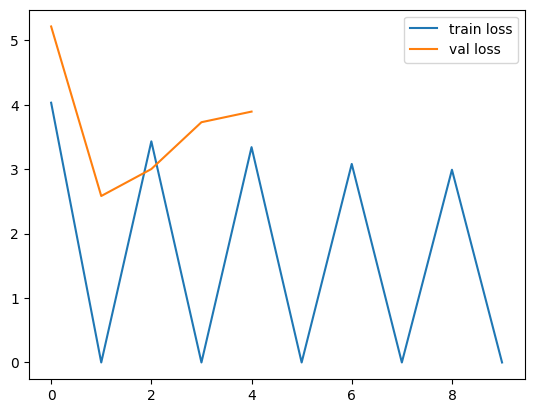

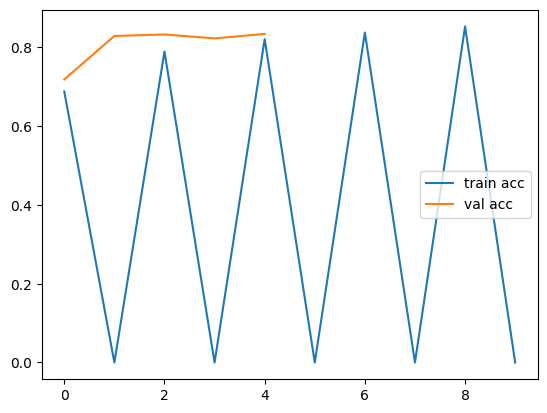

<Figure size 640x480 with 0 Axes>

In [108]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')